In [ ]:
tushare数据挖掘
情感分析 作为一种指标
LDA
clustering
各种可视化
参考社区，几个repo，和其他github代码

In [1]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
#sns.set_style('whitegrid')
import h5py
from PIL import Image
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
import jieba
from collections import Counter
import jieba.analyse
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显
plt.rc('axes',axisbelow=True)

Populating the interactive namespace from numpy and matplotlib


#font.family         : sans-serif        
#font.sans-serif     : SimHei, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif   
#axes.unicode_minus:False

In [2]:
# 确定起止日期
start_date = '2016-01-01 00:00:00'
end_date = '2019-12-20 23:59:59'
# 做一个用于tushare调用的list
from dateutil import rrule
from datetime import datetime

all_dates_list = []
for dt in rrule.rrule(rrule.DAILY,
                      dtstart=datetime.strptime(start_date.split(' ')[0], '%Y-%m-%d'),
                      until=datetime.strptime(end_date.split(' ')[0], '%Y-%m-%d')):
    all_dates_list.append(dt.strftime('%Y%m%d'))

In [3]:
cd ..

/Users/james/Desktop/Projects/ml_strategy


# 先用每天都有的CCTV数据

In [10]:
cctv_all = pd.read_table('data/news/cctv/20160101.csv',sep=',',index_col=0)
for i in tqdm(all_dates_list[1:]):
    cctv_all = pd.concat((cctv_all,pd.read_table('data/news/cctv/'+i+'.csv',sep=',',index_col=0)))
cctv_all.to_csv('data/news/cctv/all_cctv.csv')

In [4]:
cctv_all = pd.read_table('data/news/cctv/all_cctv.csv',sep=',',index_col=0)
cctv_all.tail()

,date,title,content
11,20191220,人民日报社论：续写“一国两制”成功实践新篇章——热烈祝贺澳门回归祖国二十周年,今天（12月20日）出版的人民日报发表社论，题目是《续写“一国两制”成功实践新篇章——热烈祝...
12,20191220,国内联播快讯,国务院安委会将开展全国安全生产专项督查国务院安委会今天（12月20日）宣布，将于12月下旬派...
13,20191220,《习近平谈治国理政》第一卷波兰文版首发式暨中波治国理政研讨会在华沙举行,在中国和波兰建交70周年之际，《习近平谈治国理政》第一卷波兰文版首发式暨中波治国理政研讨会1...
14,20191220,普京：俄中达到前所未有互信水平,俄罗斯总统普京19日在举行年度记者招待会时指出，俄罗斯和中国合作具有重要意义，是推动世界多极...
15,20191220,国际联播快讯,伊朗：绝不会迫于威胁与美对话联合国安理会19日召开伊朗核问题公开会。与会的伊朗代表表示，美国...


In [188]:
#过滤关键词
blacklist = ['责任编辑', '一定','一年', '一起', '一项', '一点儿', '一度','一系列','一道','一次','一亿','进行', '实现', '已经', '指出',
            '为什么', '是不是', '”', '一个', '一些', 'cctv', '一边', '一部', '一致', '一窗', '万亿元', '亿元', '一致同意', '本台记住', '发生', 
            '上述', '不仅', '不再 ', '下去', '首次', '合作', '发展', '国家', '加强', '共同', '重要', '我们', '你们', '他们', '目前',
            '领导人', '推进', '中方', '坚持', '支持', '表示', '时间', '协调', '时间', '制度', '工作', '强调', '进行', '推动', '通过',
            '北京时间', '有没有', '新闻联播', '本台消息', '这个', '那个', '就是', '今天', '明天', '参加', '今年', '明天']

#新增关键词
stopwords = ['一带一路', '雄安新区', '区块链', '数字货币', '虚拟货币',  '比特币', '对冲基金', '自贸区', '自由贸易区','乡村振兴','美丽中国','共享经济','租购同权','新零售',
             '共有产权房','楼市调控', '产权保护', '互联网金融', '5G', '4G', '国企改革', '大湾区', '长江经济带']

for word in stopwords:
        jieba.add_word(word)


mylist = []
cctv_all_df = cctv_all[cctv_all.content.isnull() == False]

In [8]:
for idx, row in tqdm(df.iloc[:100].iterrows()):
    data = jieba.cut(row['content'])
    data = dict(Counter(data))

df = pd.DataFrame(mylist, columns=['date', 'keyword', 'count'])

In [189]:
pickdate = all_dates_list[-20]
useddf = cctv_all_df[cctv_all_df['date'] ==int(pickdate)]
mylist = list(useddf.title.values.astype('str')) #decode should be string
word_list = []
#对标题内容进行分词（即切割为一个个关键词）
word_list = [" ".join(jieba.cut(sentence)) for sentence in mylist]
new_text = ' '.join(word_list)
#for sentence in tqdm(mylist):
 #   word = jieba.cut(sentence)
#    word_list.append(word)

In [27]:
img = np.array(Image.open("data/chinamap.png"))
img[img>0]=255

In [52]:
img.shape

(225, 225)

In [99]:
import PIL
img = Image.open("data/chinamap.png")
img = np.array(img.resize((800,800), PIL.Image.ANTIALIAS))
img[img>0]=255

In [156]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(100.0 * float(random_state.randint(20, 100)) / 255.0)
    s = int(100.0 * float(random_state.randint(20, 100)) / 255.0)
    l = int(100.0 * float(random_state.randint(20, 100)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(20,80))

In [185]:
def draw_wc(ind):
    pickdate = all_dates_list[ind]
    useddf = cctv_all_df[cctv_all_df['date'] ==int(pickdate)]
    mylist = list(useddf.title.values.astype('str')) #decode should be string
    word_list = []
    #对标题内容进行分词（即切割为一个个关键词）
    word_list = [" ".join(jieba.cut(sentence)) for sentence in mylist]
    new_text = ' '.join(word_list)
    wc = WordCloud(background_color="white", max_words=100, mask=img,contour_color='blue',
                   stopwords=stopwords, max_font_size=100, random_state=42,
                   width=800, height=800,
                   color_func=grey_color_func,
                  # color_func=random_color_func,
                  font_path="/Users/james/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf")


    #plt.figure( figsize=(12,8))
    plt.imshow(wc.generate(new_text),interpolation='bilinear')
    plt.title('CCTV WORD CLOUD\n(%s)' %str(pickdate[:4]+'-'+str(pickdate[4:6])+'-'+str(pickdate[6:])),fontsize=18)
    plt.axis("off")
    #plt.tight_layout(pad=0)
    plt.tight_layout()
    #plt.show()

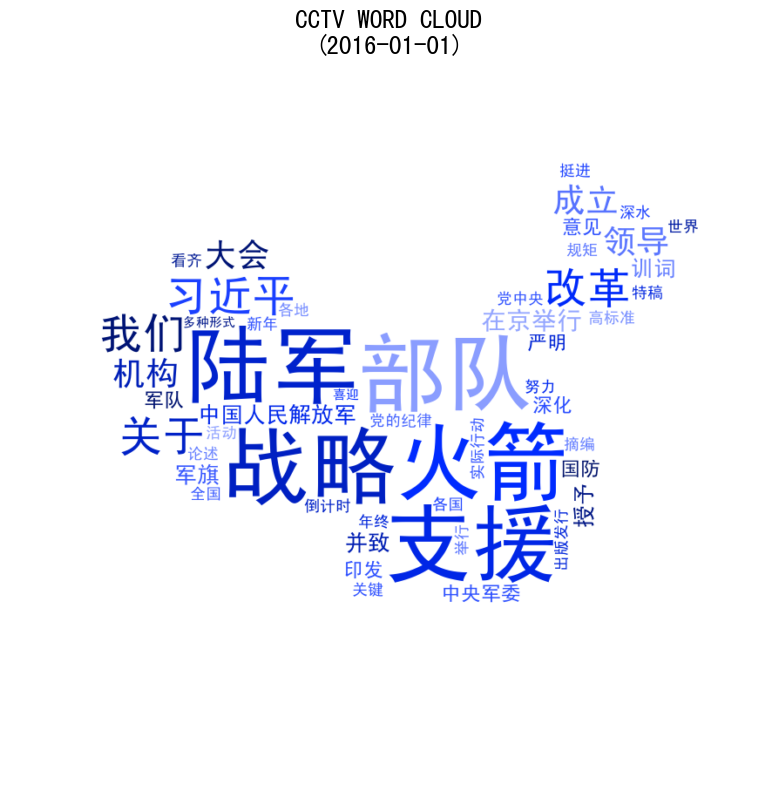

In [190]:
plt.subplots(figsize=(8,8), dpi=100)
#plt.subplots_adjust(left=0.12, right=0.98, top=0.85, bottom=0.1,hspace=0,wspace=0)  
draw_wc(0)


KeyboardInterrupt: 

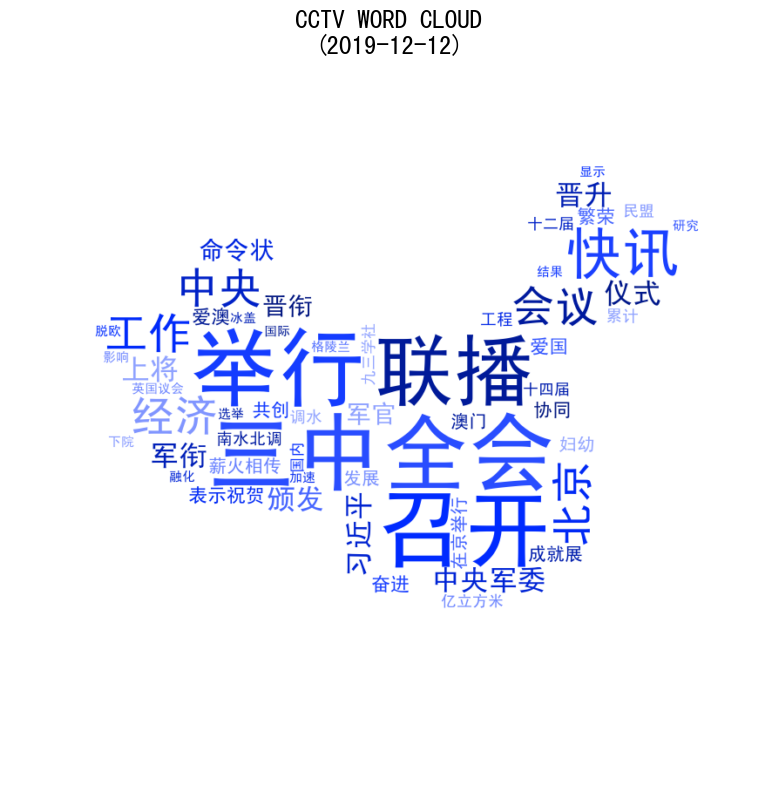

In [169]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(12,8), dpi=100)
plt.subplots_adjust(left=0.12, right=0.98, top=0.85, bottom=0.1,hspace=0,wspace=0)  
animator = animation.FuncAnimation(fig, draw_wc, frames=np.arange(-100,-1,1),interval=200)
animator.save('wc_animation1.mp4')
HTML(animator.to_jshtml())

# emotion

In [170]:
path='notebooks/'
dictionary=open(path+'否定词.txt','r',encoding='utf-8')
dict=[]
for word in dictionary:
    word=word.strip('\n')
    dict.append(word)
print(dict)

['不', '不是', '不能', '不可', '没有', '不要', '别', '没', '无', '莫', '未', '勿', '休', '甭', '非']


In [202]:
def word_processing(text):
    with open(path+'{}.txt'.format(text),encoding='utf-8') as f:
        word=[w.strip() for w in f.readlines()]
    return word
def judgeodd(n):
    if (n%2)==0:
        return 'even'
    else:
        return 'odd'
deny_word=word_processing('否定词')
posdict=word_processing('positive')
negdict=word_processing('negative')
degree_word=word_processing('程度级别词语')

mostdict = degree_word[degree_word.index('extreme')+1 : degree_word.index('very')]
#权重4，即在情感词前乘以4
verydict = degree_word[degree_word.index('very')+1 : degree_word.index('more')]
#权重3
moredict = degree_word[degree_word.index('more')+1 : degree_word.index('ish')]
#权重2
ishdict = degree_word[degree_word.index('ish')+1 : degree_word.index('last')]
#权重0.5

def sentiment_score_list(dataset,islist=False):
    if islist:
        seg_sentence = dataset
    else:
        seg_sentence = dataset.split('。')

    count1 = []
    count2 = []
    for sen in seg_sentence: #循环遍历每一个评论
        segtmp = jieba.lcut(sen, cut_all=False)  
        #把句子进行分词，以列表的形式返回
        i = 0 #记录扫描到的词的位置
        a = 0 #记录情感词的位置
        poscount = 0 #积极词的第一次分值
        poscount2 = 0 #积极词反转后的分值
        poscount3 = 0 #积极词的最后分值（包括叹号的分值）
        negcount = 0
        negcount2 = 0
        negcount3 = 0
        for word in segtmp:
            if word in posdict:  # 判断词语是否是情感词
                poscount += 1
                c = 0
                for w in segtmp[a:i]:  # 扫描情感词前的程度词
                    if w in mostdict:
                        poscount *= 4.0
                    elif w in verydict:
                        poscount *= 3.0
                    elif w in moredict:
                        poscount *= 2.0
                    elif w in ishdict:
                        poscount *= 0.5
                    elif w in deny_word:
                        c += 1
                if judgeodd(c) == 'odd':  # 扫描情感词前的否定词数
                    poscount *= -1.0
                    poscount2 += poscount
                    poscount = 0
                    poscount3 = poscount + poscount2 + poscount3
                    poscount2 = 0
                else:
                    poscount3 = poscount + poscount2 + poscount3
                    poscount = 0
                a = i + 1  # 情感词的位置变化

            elif word in negdict:  # 消极情感的分析，与上面一致
                negcount += 1
                d = 0
                for w in segtmp[a:i]:
                    if w in mostdict:
                        negcount *= 4.0
                    elif w in verydict:
                        negcount *= 3.0
                    elif w in moredict:
                        negcount *= 2.0
                    elif w in ishdict:
                        negcount *= 0.5
                    elif w in degree_word:
                        d += 1
                if judgeodd(d) == 'odd':
                    negcount *= -1.0
                    negcount2 += negcount
                    negcount = 0
                    negcount3 = negcount + negcount2 + negcount3
                    negcount2 = 0
                else:
                    negcount3 = negcount + negcount2 + negcount3
                    negcount = 0
                a = i + 1
            elif word == '！' or word == '!':  ##判断句子是否有感叹号
                for w2 in segtmp[::-1]:  # 扫描感叹号前的情感词，发现后权值+2，然后退出循环
                    if w2 in posdict or negdict:
                        poscount3 += 2
                        negcount3 += 2
                        break
            i += 1 # 扫描词位置前移


            # 以下是防止出现负数的情况
            pos_count = 0
            neg_count = 0
            if poscount3 < 0 and negcount3 > 0:
                neg_count += negcount3 - poscount3
                pos_count = 0
            elif negcount3 < 0 and poscount3 > 0:
                pos_count = poscount3 - negcount3
                neg_count = 0
            elif poscount3 < 0 and negcount3 < 0:
                neg_count = -poscount3
                pos_count = -negcount3
            else:
                pos_count = poscount3
                neg_count = negcount3

            count1.append([pos_count, neg_count])
        count2.append(count1)
        count1 = []

    return count2

def sentiment_score(senti_score_list):
    import numpy as np
    score = []
    for review in senti_score_list:
        score_array = np.array(review)
        Pos = np.sum(score_array[:, 0])
        Neg = np.sum(score_array[:, 1])
        AvgPos = np.mean(score_array[:, 0])
        AvgPos = float('%.1f'%AvgPos)
        AvgNeg = np.mean(score_array[:, 1])
        AvgNeg = float('%.1f'%AvgNeg)
        StdPos = np.std(score_array[:, 0])
        StdPos = float('%.1f'%StdPos)
        StdNeg = np.std(score_array[:, 1])
        StdNeg = float('%.1f'%StdNeg)
        score.append([Pos, Neg, AvgPos, AvgNeg, StdPos, StdNeg])
    return score

In [203]:
data = '你就是个王八蛋，混账玩意!你们的手机真不好用！非常生气，我非常郁闷！！！！'
data2= '我好开心啊，非常非常非常高兴！今天我得了一百分，我很兴奋开心，愉快，开心'
d='实在是太差了，差评'
print(sentiment_score(sentiment_score_list(data)))
print(sentiment_score(sentiment_score_list(data2)))
print(sentiment_score(sentiment_score_list(d)))

[[104.0, 189.0, 4.2, 7.6, 3.9, 6.7]]
[[327.0, 30.0, 14.9, 1.4, 22.5, 0.9]]
[[11, 0, 1.8, 0.0, 0.4, 0.0]]


In [175]:
def pos_neg_num(data):
    p=0
    n=0
    for i in range(len(data)):
        if data[i][0]>data[i][1]:
            p+=1
        else:
            n+=1
    return p,n

In [181]:
data = '你就是个王八蛋，混账玩意!你们的手机真不好用！非常生气，我非常郁闷。\
我好开心啊，非常非常非常高兴！今天我得了一百分，我很兴奋开心，愉快，开心。\
垃圾啊。\
太差了，差评。\
很好啊，超级赞的'
df=sentiment_score(sentiment_score_list(data))
print(df)
p,n=pos_neg_num(df)
print("正面评价数目：{0},负面评价数目：{1}".format(p,n))

[[60.0, 109.0, 2.9, 5.2, 2.5, 4.3], [327.0, 30.0, 14.9, 1.4, 22.5, 0.9], [0, 2, 0.0, 1.0, 0.0, 0.0], [0, 0, 0.0, 0.0, 0.0, 0.0], [23.0, 0.0, 3.3, 0.0, 1.6, 0.0]]
正面评价数目：2,负面评价数目：3


In [201]:
data

'你就是个王八蛋，混账玩意!你们的手机真不好用！非常生气，我非常郁闷。我好开心啊，非常非常非常高兴！今天我得了一百分，我很兴奋开心，愉快，开心。垃圾啊。太差了，差评。很好啊，超级赞的'

In [182]:
df

[[60.0, 109.0, 2.9, 5.2, 2.5, 4.3],
 [327.0, 30.0, 14.9, 1.4, 22.5, 0.9],
 [0, 2, 0.0, 1.0, 0.0, 0.0],
 [0, 0, 0.0, 0.0, 0.0, 0.0],
 [23.0, 0.0, 3.3, 0.0, 1.6, 0.0]]

## 显示每天正面和负面新闻内容数量

In [197]:
def get_cctv_news(ind):
    pickdate = all_dates_list[ind]
    useddf = cctv_all_df[cctv_all_df['date'] ==int(pickdate)]
    mylist = list(useddf.content.values.astype('str')) #decode should be string
    
    return mylist

In [198]:
cctv_all_df.head()

,date,title,content
0,20160101,陆军领导机构火箭军战略支援部队成立大会在京举行 习近平向中国人民解放军陆军火箭军战略支援部队...,中国人民解放军陆军领导机构、中国人民解放军火箭军、中国人民解放军战略支援部队成立大会2015...
1,20160101,中央军委印发《关于深化国防和军队改革的意见》,经中央军委主席习近平批准，中央军委近日印发了《关于深化国防和军队改革的意见》。《意见》强调，...
2,20160101,《习近平关于严明党的纪律和规矩论述摘编》出版发行,由中共中央纪律检查委员会、中共中央文献研究室编辑的《习近平关于严明党的纪律和规矩论述摘编》一...
3,20160101,以实际行动向党中央看齐 向高标准努力,广大党员干部正在积极学习习近平总书记在中央政治局专题民主生活会上的重要讲话。大家纷纷表示要把...
4,20160101,【年终特稿】关键之年 改革挺进深水区,刚刚过去的2015年，是全面深化改革的关键之年。改革集中发力在制约经济社会发展的深层次矛盾，...


In [199]:
get_cctv_news(1)

['2015年是“全面推进依法治国”的开局之年，习近平总书记提出“要全面推进依法治国，更好维护人民群众合法权益”。按照依法治国的路线图，中国法治在科学立法、司法改革和平安建设等方面一路向前，促进社会公平正义。本台今天的年终特稿，为您播出《依法治国按下“快进键”》。2015年12月29号，一南一北两起大案的同日开庭，在年末再次把人们的目光凝聚到司法与公正。在海口，因“事实不清、证据不足”，最高人民法院启动陈满故意杀人、放火案再审，法律将对已经服刑23年的陈满做出公正的判决，人们对于公正的信心来自今天的依法治国；在河北保定，受贿金额超过2亿元的国家能源局煤炭司原副司长魏鹏远出庭受审，依法反腐不留死角，人们对于法可治权的信心同样来自依法治国。“让人民群众在每一起司法案件中感受到公平与正义”，这句话，在过去的这一年，前所未有地广为人知、深入人心。2015年5月，江苏盐城一对年过七旬的老夫妻因为楼下的污染问题将当地的市场监督管理局告上了法庭。老夫妇最终打赢了这场行政诉讼官司，得益于一部新法的修订与实施。2015年5月1号，新修改的《行政诉讼法》正式实施，新法最大的亮点就是要求行政首长出庭应诉，“告官不见官”自此成为了过去式。这一年我们身边的法在变，这些变化回应的正是我们每一个人愈发关切的现实。新通过的《刑法修正案(九)》规定了收买被拐妇女、儿童一律追究刑责，买卖同罪；27年后首次大修的《大气污染防治法》在法条数量上翻了近一倍，以法治霾、史上最严；2015年全国人大常委会制定新法4件，修改法律18件，科学立法在我们的身边、在中国年度法治进程中留下了一个又一个烙印。发生变化的不仅是字面上的法条，司法体制改革在这一年也开始落地生根。习近平指出，“深化司法体制改革，建设公正高效权威的社会主义司法制度，是推进国家治理体系和治理能力现代化的重要举措。”改没改，看变化。2015年5月1号，全国各级人民法院改革立案制度，正式实施立案登记制，对依法应该受理的案件，做到有案必立、有诉必理。发生在北京市朝阳区法院里的这一幕，值得我们在记忆中存档，5月4号，是立案登记制实施后第一个工作日，一名北京律师拖着一个装满立案材料的拉杆箱，要求对涉及供暖纠纷的208起案件立案。一天之内，法院全部依法予以立案。按照这名律师的计算，以往为这208起案子立案，至少需要一年。2015年12月16号，山东省庆云县人民检

In [204]:
df=sentiment_score(sentiment_score_list(get_cctv_news(1),islist=True))
print(df)
p,n=pos_neg_num(df)
print("正面评价数目：{0},负面评价数目：{1}".format(p,n))

[[37579.0, 8820.0, 45.1, 10.6, 22.2, 6.4], [10370.0, 713.0, 27.2, 1.9, 14.7, 1.3], [13802.5, 3711.0, 33.2, 8.9, 22.5, 5.1], [4775.0, 775.0, 17.8, 2.9, 9.5, 2.5], [5054.0, 513.0, 19.4, 2.0, 11.8, 1.3], [1583.0, 876.0, 8.5, 4.7, 6.5, 2.7], [3218, 505, 14.3, 2.2, 8.7, 1.4], [654, 74, 4.5, 0.5, 3.9, 0.5], [3887, 958, 12.0, 3.0, 6.1, 2.2], [1054.0, 15.0, 8.4, 0.1, 7.5, 0.3], [4184.0, 2363.0, 16.1, 9.1, 12.1, 6.6], [2912.0, 1464.0, 13.0, 6.5, 8.2, 4.4], [21, 23, 0.5, 0.5, 0.5, 0.5]]
正面评价数目：12,负面评价数目：1


In [208]:
emotion_num = pd.DataFrame(index=np.arange(len(all_dates_list)),\
                           columns=['positive','negative'])
for i in tqdm(range(len(all_dates_list))):
    df=sentiment_score(sentiment_score_list(get_cctv_news(i),islist=True))
    #print(df)
    p,n=pos_neg_num(df)
    emotion_num.iloc[i] = np.array([p,n])

In [210]:
emotion_num.to_csv('data/cctv_emotion_pos_neg_num.csv')

In [211]:
##### CCTV数据如何用于选股？只能作为总体考虑？


1

In [234]:
[plt.get_cmap('Set3')[i] for i in range(10)]

TypeError: 'ListedColormap' object is not subscriptable

In [293]:
cctv_ratio = np.array(emotion_num.iloc[:,0]/(emotion_num.iloc[:,0]+emotion_num.iloc[:,1]))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

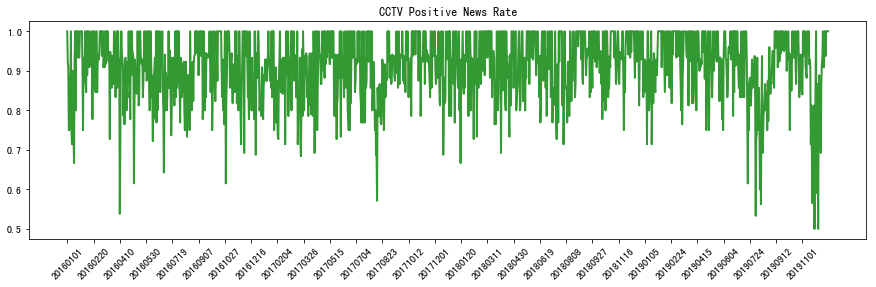

In [242]:
fig,ax=plt.subplots(1,figsize=(15,4))
ax.set_xticks(np.arange(0,len(all_dates_list),50))

ax.plot(all_dates_list,\
        ratio,color='g',linewidth=2,alpha=0.8)
ax.set_title('CCTV Positive News Rate')
plt.setp(plt.gca().xaxis.get_majorticklabels(),
         'rotation', 45)

In [259]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scalar1= StandardScaler()
scalar2= MinMaxScaler()

In [304]:
index = np.arange(0,len(all_dates_list),3).astype('int')
ratio = cctv_ratio-np.average(cctv_ratio)

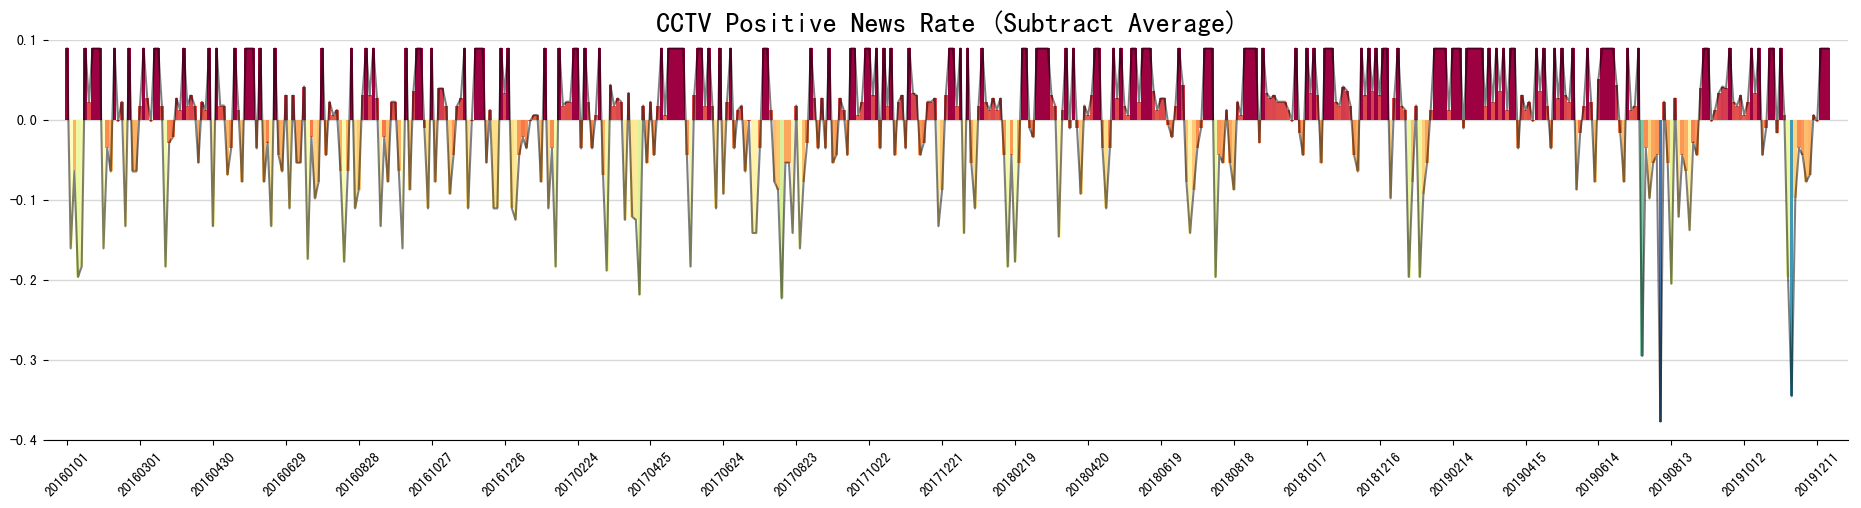

In [307]:
colors = cm.Spectral_r(scalar2.fit_transform(ratio.reshape(-1,1)).ravel())[index]
#colors = cm.Spectral_r(ratio)[index]
fig =plt.figure(figsize=(20,4), dpi=100)
plt.xticks(np.arange(0,len(all_dates_list),20),rotation=45)
plt.subplots_adjust(top=1,bottom=0,left=0,right=0.9,hspace=0,wspace=0)
plt.bar(np.array(all_dates_list)[index],ratio[index],color=colors,width=1,align="center",zorder=1)
plt.plot(np.array(all_dates_list)[index],ratio[index], color='k',zorder=1,alpha=0.5)
#plt.scatter(all_dates_list[-1], ratio[-1], color='white',s=150,edgecolor ='k',linewidth=2,zorder=3)
#plt.text(all_dates_list[-1], ratio[-1]*1.05,s=np.round(ratio[-1],1),size=10,ha='center', va='top')
plt.ylim(-0.4, 0.1)
plt.margins(x=0.01)
ax = plt.gca()#获取边框
ax.spines['top'].set_color('none')   # 设置上‘脊梁’为无色
ax.spines['right'].set_color('none')  # 设置上‘脊梁’为无色
ax.spines['left'].set_color('none')   # 设置上‘脊梁’为无色
plt.grid(axis="y",c=(217/256,217/256,217/256),linewidth=1)   #设置网格线   
plt.title('CCTV Positive News Rate (Subtract Average)',fontsize=20)
plt.show()

In [322]:
ratio = np.average(ratio[:-10].reshape(-1,15),axis=1)

In [333]:
np.average(ratio[:-10].reshape(-1,30),axis=1)

array([-0.00520219,  0.00926735,  0.02960896, -0.02664005, -0.01159766,
       -0.00688022, -0.03623493, -0.04300402,  0.02274754,  0.00710662,
        0.00134899, -0.02887286, -0.014327  , -0.033588  , -0.02670626,
       -0.02309132,  0.0323695 , -0.02447693,  0.00031082, -0.05522102,
       -0.00387751,  0.01339401,  0.04718336, -0.00261054,  0.00125264,
       -0.00114066,  0.03822929, -0.01061571, -0.00391773,  0.0375894 ,
       -0.00185852, -0.02326806,  0.03893   ,  0.0247049 ,  0.02734125,
        0.04531885,  0.01020346,  0.02317221,  0.03844586,  0.02752857,
        0.01836378,  0.01240239,  0.01856261, -0.07417761, -0.06276023,
        0.04306715,  0.02651711, -0.09666422])

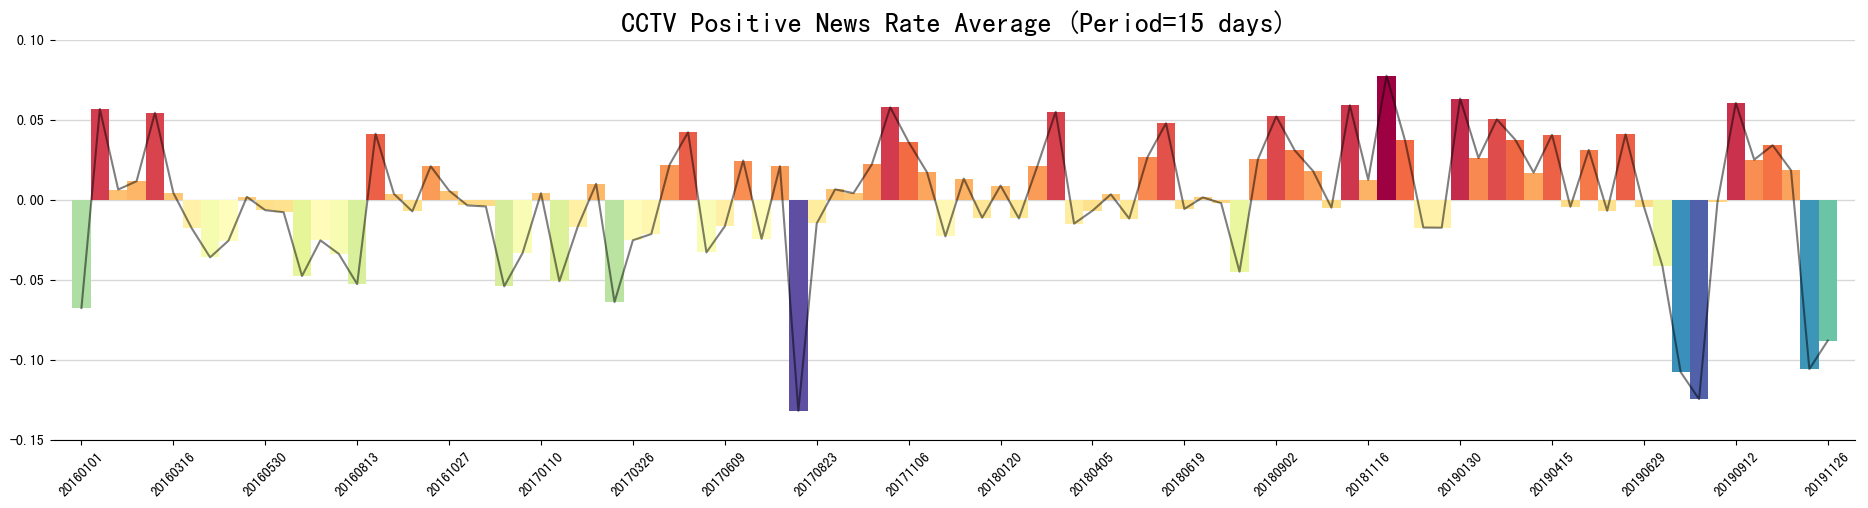

In [330]:
index = np.arange(0,len(all_dates_list),15).astype('int')[:-1]

colors = cm.Spectral_r(scalar2.fit_transform(ratio.reshape(-1,1)).ravel())
#colors = cm.Spectral_r(ratio)[index]
fig =plt.figure(figsize=(20,4), dpi=100)
plt.xticks(np.arange(0,np.array(all_dates_list)[index].shape[0],5),rotation=45)
plt.subplots_adjust(top=1,bottom=0,left=0,right=0.9,hspace=0,wspace=0)
plt.bar(np.array(all_dates_list)[index],ratio ,color=colors,width=1,align="center",zorder=1)
plt.plot(np.array(all_dates_list)[index],ratio , color='k',zorder=1,alpha=0.5)
#plt.scatter(all_dates_list[-1], ratio[-1], color='white',s=150,edgecolor ='k',linewidth=2,zorder=3)
#plt.text(all_dates_list[-1], ratio[-1]*1.05,s=np.round(ratio[-1],1),size=10,ha='center', va='top')
plt.ylim(-0.15, 0.1)
plt.margins(x=0.01)
ax = plt.gca()#获取边框
ax.spines['top'].set_color('none')   # 设置上‘脊梁’为无色
ax.spines['right'].set_color('none')  # 设置上‘脊梁’为无色
ax.spines['left'].set_color('none')   # 设置上‘脊梁’为无色
plt.grid(axis="y",c=(217/256,217/256,217/256),linewidth=1)   #设置网格线   
plt.title('CCTV Positive News Rate Average (Period=15 days)',fontsize=20)
plt.show()

In [312]:
ratio[:-10]

array([ 0.08973158,  0.0128085 , -0.00117751, ...,  0.00639824,
        0.02306491,  0.08973158])

Text(0.5, 1.0, 'CCTV Positive News Rate Distribution')

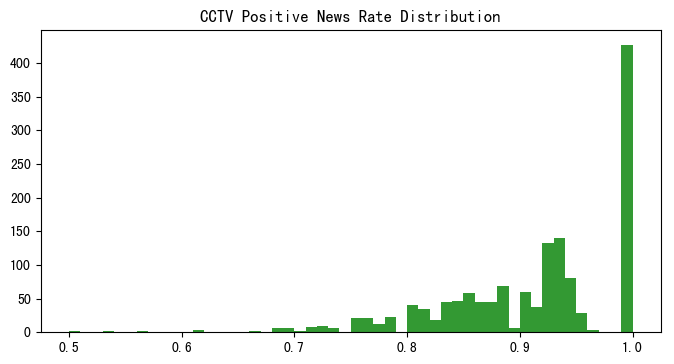

In [289]:
fig,ax=plt.subplots(1,figsize=(8,4), dpi=100)
ax.hist(ratio,bins=50,color='g',alpha=0.8)
ax.set_title('CCTV Positive News Rate Distribution')

In [290]:
np.average(ratio)

0.9102684219354659

In [336]:
ratio.shape

(1450,)

In [471]:
aveyear = np.ndarray([4])
for i in range(4):
    aveyear[i] = np.average(cctv_ratio[i*365:(i+1)*365])
aveyear_ = np.concatenate((np.repeat(aveyear[0],366),np.repeat(aveyear[1],365),np.repeat(aveyear[2],365),\
np.repeat(aveyear[3],354)))

In [472]:
ratio = cctv_ratio-aveyear_#np.median(cctv_ratio)
ratio_df = pd.DataFrame(ratio,index=all_dates_list,columns=['ratio'])

In [478]:
ratio_df.to_csv('data/cctv_ratio_subtractaveyear.csv')

In [473]:
#ratio_df = pd.DataFrame(cctv_ratio,index=all_dates_list,columns=['ratio'])

In [474]:
cumulative_weight =1
today = datetime(2019,1,4).strftime('%Y%m%d')
refresh_rate = 30
locationin_cctv_df = np.where(ratio_df.index ==today)[0][0]
max(locationin_cctv_df-refresh_rate,0)

1069

In [475]:
cum_weigt = []
for i in np.arange(0,len(all_dates_list),15):
    today = all_dates_list[i]
    locationin_cctv_df = np.where(ratio_df.index ==today)[0][0]
    average_cctv = np.average(ratio_df.iloc[max(locationin_cctv_df-refresh_rate,0):\
                  max(locationin_cctv_df-refresh_rate,0)+refresh_rate])
    cumulative_weight +=average_cctv
    if cumulative_weight >=1:
        cumulative_weight= 1
    #print (cumulative_weight)
    cum_weigt.append(cumulative_weight)

In [ ]:
#for uqer 
ratio_df = pd.read_table('data/cctv_ratio_subtractaveyear.csv',sep=',',index_col=0)
locationin_cctv_df = np.where(ratio_df.index ==today.strftime('%Y%m%d'))[0][0]
average_cctv = np.average(ratio_df.iloc[max(locationin_cctv_df-refresh_rate,0):\
              max(locationin_cctv_df-refresh_rate,0)+refresh_rate])
cumulative_weight +=average_cctv
if cumulative_weight >=1:
    cumulative_weight= 1

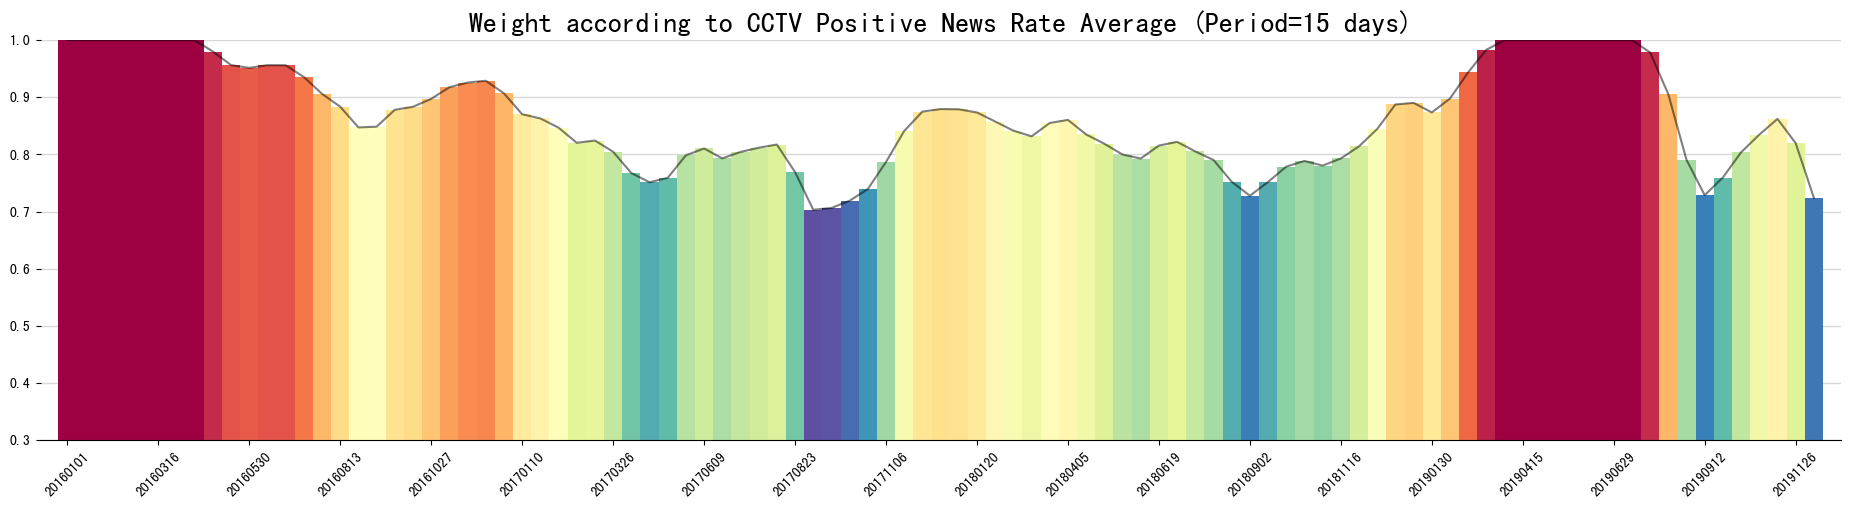

In [477]:
index = np.arange(0,len(all_dates_list),15).astype('int')
ratio = np.array(cum_weigt)
colors = cm.Spectral_r(scalar2.fit_transform(ratio.reshape(-1,1)).ravel())
#colors = cm.Spectral_r(ratio)[index]
fig =plt.figure(figsize=(20,4), dpi=100)
plt.xticks(np.arange(0,np.array(all_dates_list)[index].shape[0],5),rotation=45)
plt.subplots_adjust(top=1,bottom=0,left=0,right=0.9,hspace=0,wspace=0)
plt.bar(np.array(all_dates_list)[index],ratio ,color=colors,width=1,align="center",zorder=1)
plt.plot(np.array(all_dates_list)[index],ratio , color='k',zorder=1,alpha=0.5)
#plt.scatter(all_dates_list[-1], ratio[-1], color='white',s=150,edgecolor ='k',linewidth=2,zorder=3)
#plt.text(all_dates_list[-1], ratio[-1]*1.05,s=np.round(ratio[-1],1),size=10,ha='center', va='top')
plt.ylim(0.3, 1)
plt.margins(x=0.01)
ax = plt.gca()#获取边框
ax.spines['top'].set_color('none')   # 设置上‘脊梁’为无色
ax.spines['right'].set_color('none')  # 设置上‘脊梁’为无色
ax.spines['left'].set_color('none')   # 设置上‘脊梁’为无色
plt.grid(axis="y",c=(217/256,217/256,217/256),linewidth=1)   #设置网格线   
plt.title('Weight according to CCTV Positive News Rate Average (Period=15 days)',fontsize=20)
plt.show()

In [ ]:
cumulative_weight =1

if average_cctv<=0:
    weight = 1- average_cctv
else:
    weight = 1

In [514]:
featurename = ['ROA', 'PE','ROE','Volatility','HBETA','Sentiment','Heat']
linestyle = ['solid', 'dotted','dashed',  'dashdot','solid', 'dotted','dashed']

[Text(0, 0, '20160101'),
 Text(0, 0, '20160215'),
 Text(0, 0, '20160331'),
 Text(0, 0, '20160515'),
 Text(0, 0, '20160629'),
 Text(0, 0, '20160813'),
 Text(0, 0, '20160927'),
 Text(0, 0, '20161111'),
 Text(0, 0, '20161226'),
 Text(0, 0, '20170209'),
 Text(0, 0, '20170326'),
 Text(0, 0, '20170510'),
 Text(0, 0, '20170624'),
 Text(0, 0, '20170808'),
 Text(0, 0, '20170922'),
 Text(0, 0, '20171106'),
 Text(0, 0, '20171221'),
 Text(0, 0, '20180204'),
 Text(0, 0, '20180321'),
 Text(0, 0, '20180505'),
 Text(0, 0, '20180619'),
 Text(0, 0, '20180803'),
 Text(0, 0, '20180917'),
 Text(0, 0, '20181101'),
 Text(0, 0, '20181216'),
 Text(0, 0, '20190130'),
 Text(0, 0, '20190316'),
 Text(0, 0, '20190430'),
 Text(0, 0, '20190614'),
 Text(0, 0, '20190729'),
 Text(0, 0, '20190912'),
 Text(0, 0, '20191027'),
 Text(0, 0, '20191211')]

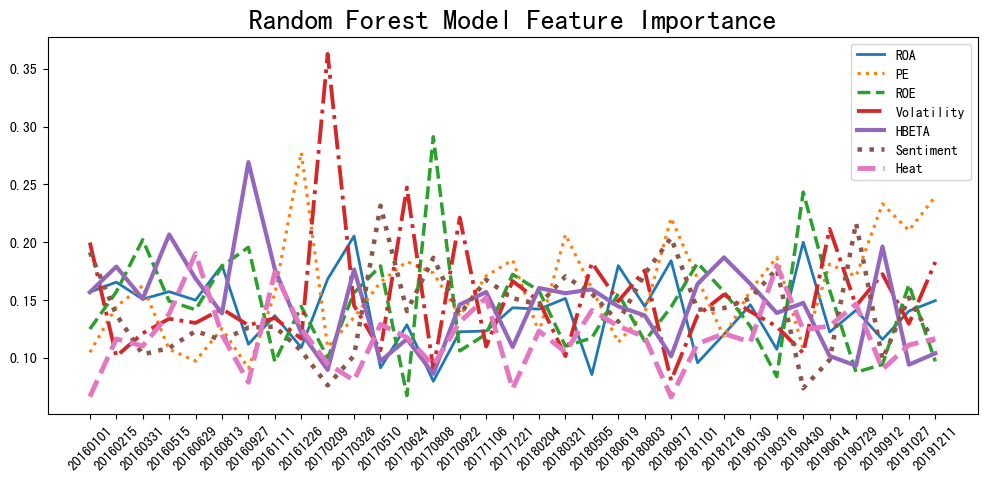

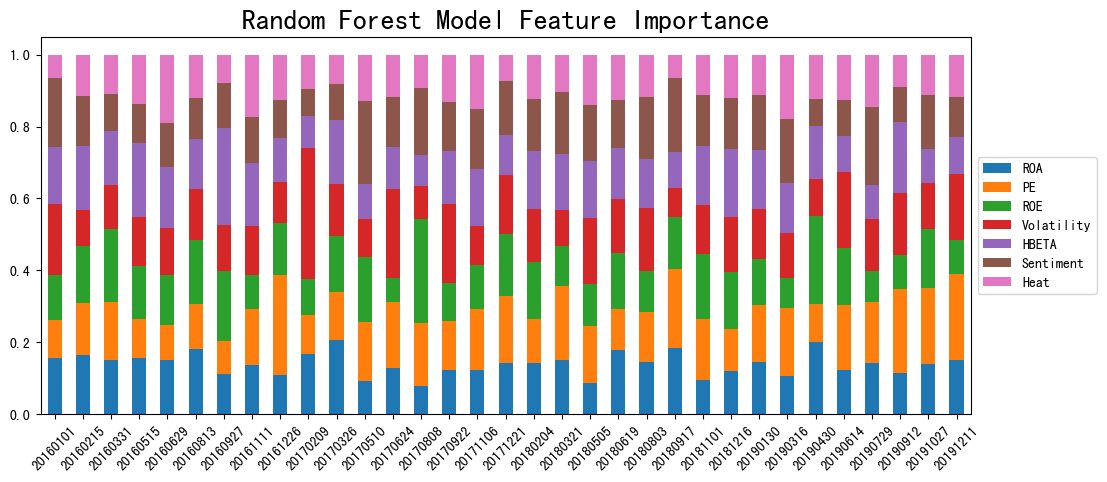

In [528]:
rfweight = np.loadtxt('data/rf_regressor_10_weight.txt').reshape(-1,7)
fig,ax=plt.subplots(figsize=(12,5),dpi=100)
index = np.arange(0,len(all_dates_list),45).astype('int')
plt.xticks(rotation=45)
for i in range(7):
    ax.plot(np.array(all_dates_list)[index],rfweight[:,i],label=featurename[i],
            linewidth=2+i*0.25,linestyle=linestyle[i])
ax.set_title('Random Forest Model Feature Importance',fontsize=20)
ax.legend()

weight_df = pd.DataFrame(rfweight,columns=featurename)
fig,ax=plt.subplots(figsize=(12,5),dpi=100)
weight_df.plot(kind='bar', stacked=True,ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Random Forest Model Feature Importance',fontsize=20)
ax.set_xticklabels(np.array(all_dates_list)[index],rotation=45)

[Text(0, 0, '20160101'),
 Text(0, 0, '20160215'),
 Text(0, 0, '20160331'),
 Text(0, 0, '20160515'),
 Text(0, 0, '20160629'),
 Text(0, 0, '20160813'),
 Text(0, 0, '20160927'),
 Text(0, 0, '20161111'),
 Text(0, 0, '20161226'),
 Text(0, 0, '20170209'),
 Text(0, 0, '20170326'),
 Text(0, 0, '20170510'),
 Text(0, 0, '20170624'),
 Text(0, 0, '20170808'),
 Text(0, 0, '20170922'),
 Text(0, 0, '20171106'),
 Text(0, 0, '20171221'),
 Text(0, 0, '20180204'),
 Text(0, 0, '20180321'),
 Text(0, 0, '20180505'),
 Text(0, 0, '20180619'),
 Text(0, 0, '20180803'),
 Text(0, 0, '20180917'),
 Text(0, 0, '20181101'),
 Text(0, 0, '20181216'),
 Text(0, 0, '20190130'),
 Text(0, 0, '20190316'),
 Text(0, 0, '20190430'),
 Text(0, 0, '20190614'),
 Text(0, 0, '20190729'),
 Text(0, 0, '20190912'),
 Text(0, 0, '20191027'),
 Text(0, 0, '20191211')]

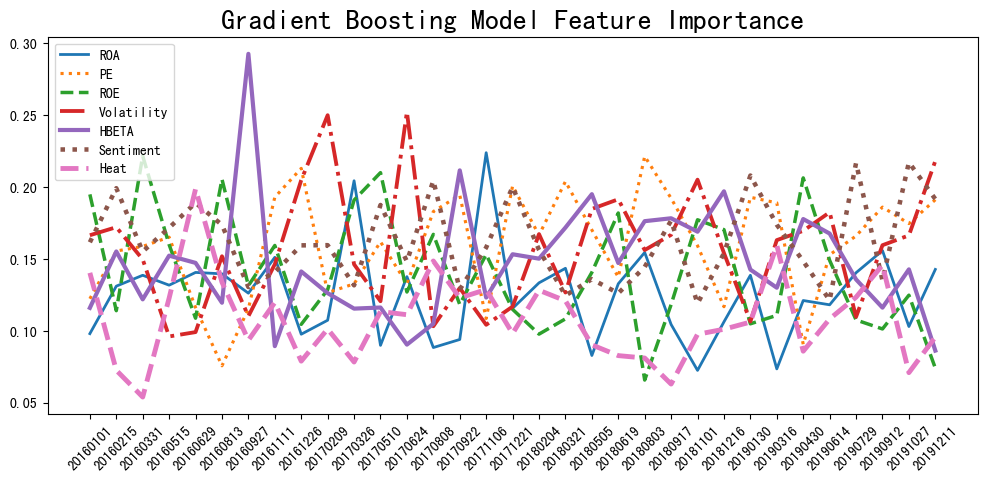

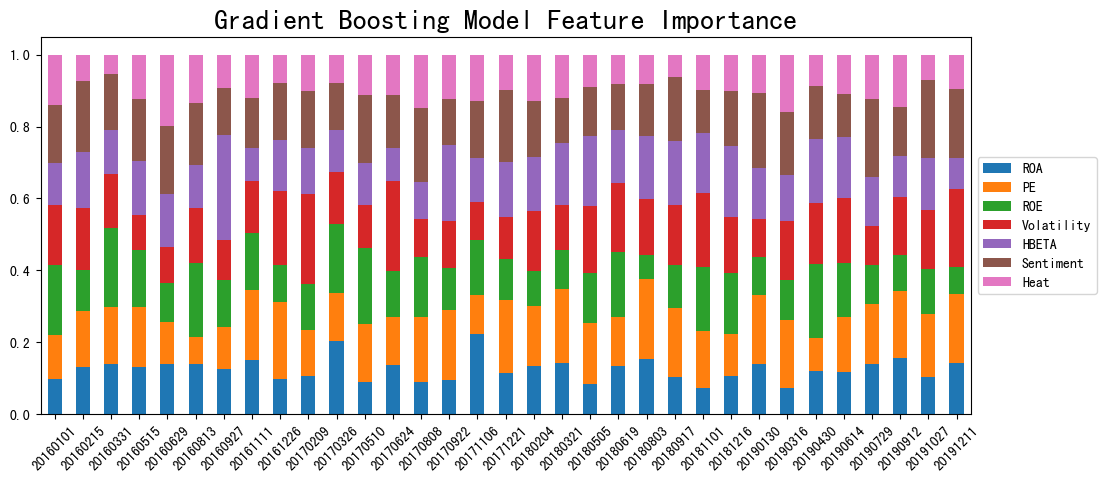

In [529]:
rfweight = np.loadtxt('data/xgboost_regressor_10_weight.txt').reshape(-1,7)
fig,ax=plt.subplots(figsize=(12,5),dpi=100)
index = np.arange(0,len(all_dates_list),45).astype('int')
plt.xticks(rotation=45)
for i in range(7):
    ax.plot(np.array(all_dates_list)[index],rfweight[:,i],label=featurename[i],
            linewidth=2+i*0.25,linestyle=linestyle[i])
ax.set_title('Gradient Boosting Model Feature Importance',fontsize=20)
ax.legend()

weight_df = pd.DataFrame(rfweight,columns=featurename)
fig,ax=plt.subplots(figsize=(12,5),dpi=100)
weight_df.plot(kind='bar', stacked=True,ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Gradient Boosting Model Feature Importance',fontsize=20)
ax.set_xticklabels(np.array(all_dates_list)[index],rotation=45)

[Text(0, 0, '20160101'),
 Text(0, 0, '20160215'),
 Text(0, 0, '20160331'),
 Text(0, 0, '20160515'),
 Text(0, 0, '20160629'),
 Text(0, 0, '20160813'),
 Text(0, 0, '20160927'),
 Text(0, 0, '20161111'),
 Text(0, 0, '20161226'),
 Text(0, 0, '20170209'),
 Text(0, 0, '20170326'),
 Text(0, 0, '20170510'),
 Text(0, 0, '20170624'),
 Text(0, 0, '20170808'),
 Text(0, 0, '20170922'),
 Text(0, 0, '20171106'),
 Text(0, 0, '20171221'),
 Text(0, 0, '20180204'),
 Text(0, 0, '20180321'),
 Text(0, 0, '20180505'),
 Text(0, 0, '20180619'),
 Text(0, 0, '20180803'),
 Text(0, 0, '20180917'),
 Text(0, 0, '20181101'),
 Text(0, 0, '20181216'),
 Text(0, 0, '20190130'),
 Text(0, 0, '20190316'),
 Text(0, 0, '20190430'),
 Text(0, 0, '20190614'),
 Text(0, 0, '20190729'),
 Text(0, 0, '20190912'),
 Text(0, 0, '20191027'),
 Text(0, 0, '20191211')]

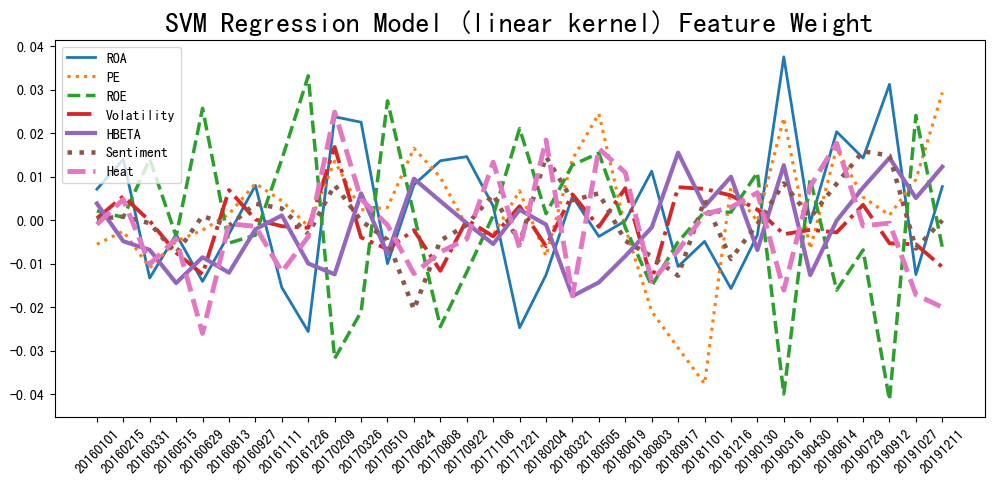

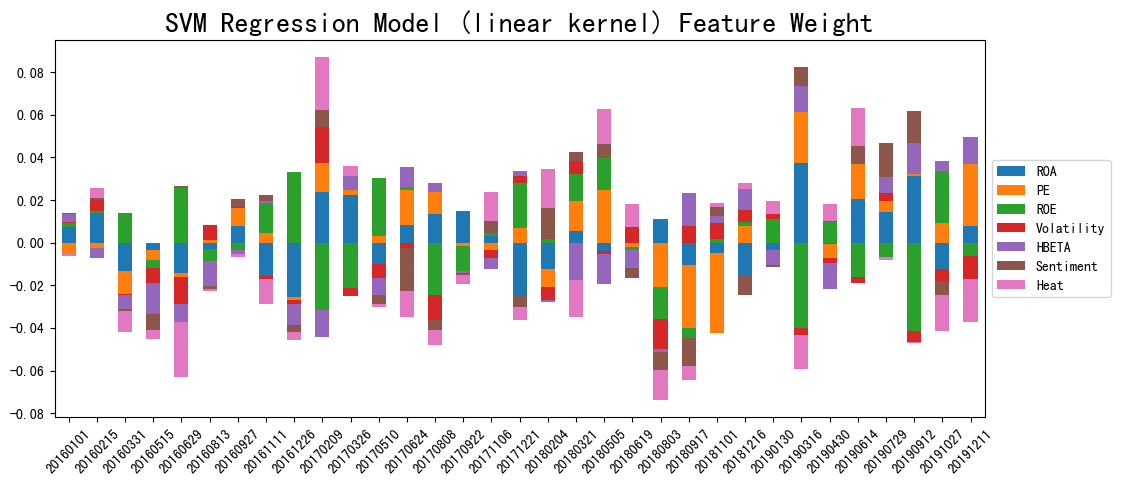

In [533]:
rfweight = np.loadtxt('data/svm_regressor_10_weight.txt').reshape(-1,7)
fig,ax=plt.subplots(figsize=(12,5),dpi=100)
index = np.arange(0,len(all_dates_list),45).astype('int')
plt.xticks(rotation=45)
for i in range(7):
    ax.plot(np.array(all_dates_list)[index],rfweight[:,i],label=featurename[i],
            linewidth=2+i*0.25,linestyle=linestyle[i])
ax.set_title('SVM Regression Model (linear kernel) Feature Weight',fontsize=20)
ax.legend()

weight_df = pd.DataFrame(rfweight,columns=featurename)
fig,ax=plt.subplots(figsize=(12,5),dpi=100)
weight_df.plot(kind='bar', stacked=True,ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('SVM Regression Model (linear kernel) Feature Weight',fontsize=20)
ax.set_xticklabels(np.array(all_dates_list)[index],rotation=45)